In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import itertools

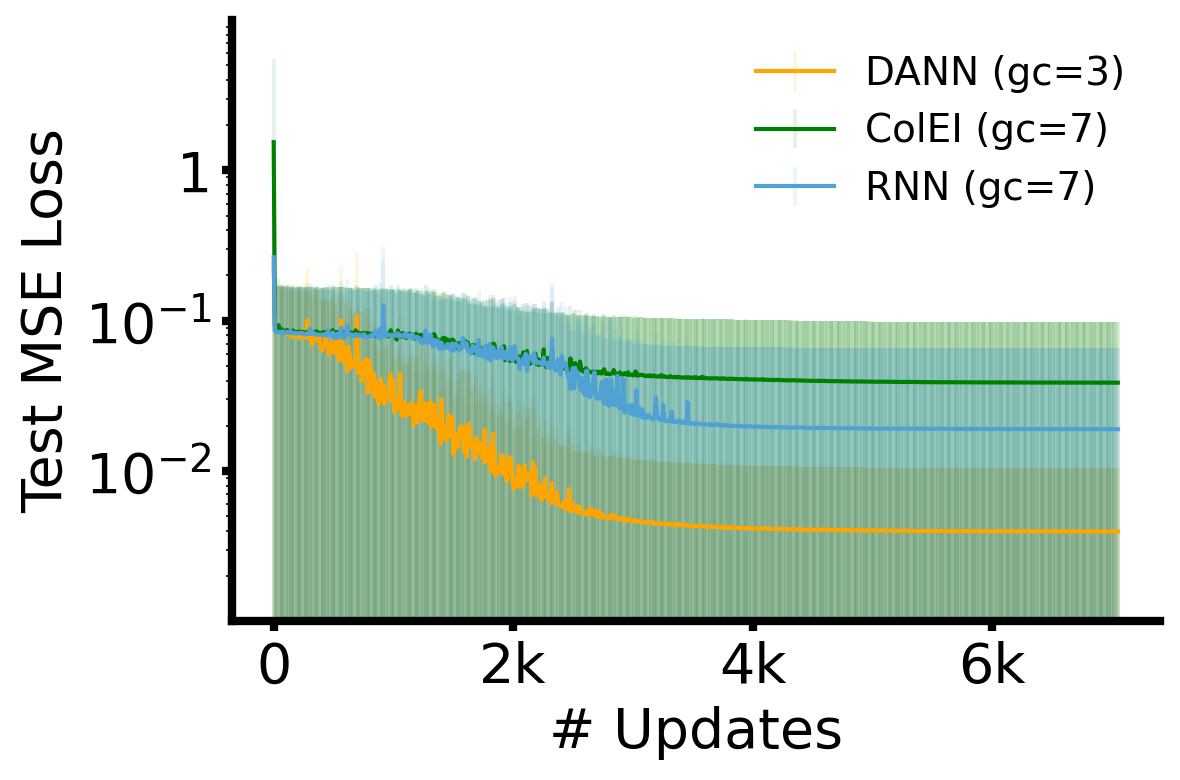

In [23]:
rnn = {k: np.zeros((10,800)) for k in ["test_loss", "val_loss", "train_loss", "update"]}
dann_rnn = {k: np.zeros((10,800)) for k in ["test_loss", "val_loss", "train_loss", "update"]}
song_rnn = {k: np.zeros((10,800)) for k in ["test_loss", "val_loss", "train_loss", "update"]}

grad_clip_list = [1, 3, 5, 7, None]
lr_list = [1, 1e-1, 1e-2, 1e-3, 1e-4] 
seeds = 5
para_comb = list(itertools.product(lr_list, grad_clip_list)) 

for i,seed in enumerate([0,1,2,3,4]):
    (lr, GC) = (0.1, 7)
    r = np.load(f'/network/projects/linclab_users/danns/playground/adding_10_rnn_neural_comp_test/batch_size-64/seed-{seed}/rnn_learning_curves_seed{seed}_lr{lr}_GC{GC}_decay0.99.npz')
    rnn["train_loss"][i, :] = r["train_loss"]
    # rnn["val_loss"][i, :] = r["val_loss"]
    rnn["test_loss"][i, :] = r["test_loss"]
    rnn["update"][i, :] = r["update"]
    
    (lr, GC) = (0.1, 3)
    d = np.load(f'/network/projects/linclab_users/danns/playground/adding_10_danns_neural_comp_test/batch_size-64/seed-{seed}/danns_learning_curves_seed{seed}_lr{lr}_GC{GC}_decay0.99.npz')
    dann_rnn["train_loss"][i, :] = d["train_loss"]
    # dann_rnn["val_loss"][i, :] = d["val_loss"]
    dann_rnn["test_loss"][i, :] = d["test_loss"]
    dann_rnn["update"][i, :] = d["update"]
    
    (lr, GC) = (0.1, 7)
    s = np.load(f'/network/projects/linclab_users/danns/playground/adding_10_song_neural_comp_test/batch_size-64/seed-{seed}/song_learning_curves_seed{seed}_lr{lr}_GC{GC}_decay0.99.npz')
    song_rnn["train_loss"][i, :] = s["train_loss"]
    # song_rnn["val_loss"][i, :] = s["val_loss"]
    song_rnn["test_loss"][i, :] = s["test_loss"]
    song_rnn["update"][i, :] = s["update"]
    
transparency = 0.1

ax = plt.subplot(111)
matplotlib.rcParams['figure.dpi'] = 200
matplotlib.rcParams["figure.figsize"] = (6,4)

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.spines.left.set_linewidth(3)
ax.spines.bottom.set_linewidth(3)
ax.xaxis.set_tick_params(width=3)
ax.yaxis.set_tick_params(width=3)


# _, _, bars = plt.errorbar(x=np.mean(rnn["update"], axis=0), y=np.mean(rnn["test_loss"], axis=0), yerr=0, color='#50a2d5')
# [bar.set_alpha(transparency) for bar in bars]
# # _, _, bars = plt.errorbar(x=np.mean(dann_rnn["update"], axis=0), y=np.mean(dann_rnn["test_loss"], axis=0), yerr=0, color='orange')
# # [bar.set_alpha(transparency) for bar in bars]
# _, _, bars = plt.errorbar(x=np.mean(song_rnn["update"], axis=0), y=np.mean(song_rnn["test_loss"], axis=0), yerr=0, color='green')
# [bar.set_alpha(transparency) for bar in bars]


_, _, bars = plt.errorbar(x=np.mean(dann_rnn["update"], axis=0), y=np.mean(dann_rnn["test_loss"], axis=0), yerr=np.std(dann_rnn["test_loss"], axis=0), color='orange')
[bar.set_alpha(transparency) for bar in bars]
_, _, bars = plt.errorbar(x=np.mean(song_rnn["update"], axis=0), y=np.mean(song_rnn["test_loss"], axis=0), yerr=np.std(song_rnn["test_loss"], axis=0), color='green')
[bar.set_alpha(transparency) for bar in bars]
_, _, bars = plt.errorbar(x=np.mean(rnn["update"], axis=0), y=np.mean(rnn["test_loss"], axis=0), yerr=np.std(rnn["test_loss"], axis=0), color='#50a2d5')
[bar.set_alpha(transparency) for bar in bars]


plt.yscale('log')
plt.ylim([0.001, 10.]) # All three
# plt.ylim([0.01, 1.]) # RNN and Song
# plt.axhline(0.1767, color='black') # baseline

plt.yticks(ticks=[1, 0.1, 0.01], labels=[r"1", r"$10^{-1}$", r"$10^{-2}$"], size=20)
# plt.yticks(ticks=[10, 0.1, 0.001], labels=[r"10", r"$10^{-1}$", r"$10^{-3}$"], size=20)
plt.xticks(ticks=[0, 2000, 4000, 6000], labels=["0", "2k", "4k", "6k"], size=20)
# plt.legend(["Baseline", "RNN (gc=7)", "Song (gc=7)"], fontsize=16, frameon=False)
# plt.legend(["ColEI (gc=7)", "RNN (gc=7)"], fontsize=16, frameon=False)
# plt.legend(["Baseline", "RNN (gc=7)", "DANN (gc=3)", "Song (gc=7)"], fontsize=14, frameon=False)
plt.legend(["DANN (gc=3)", "ColEI (gc=7)", "RNN (gc=7)"], fontsize=14, frameon=False)
plt.ylabel('Test MSE Loss', fontsize=20)
plt.xlabel('# Updates', fontsize=20)
plt.tight_layout()
# plt.savefig('new_plots/adding_RNN_Song.png', format='png', dpi=200, bbox_inches="tight")
# plt.savefig('new_plots/adding_RNN_Song.svg', format='svg', dpi=200, bbox_inches="tight")

# plt.savefig('new_plots/adding_RNN_Song_errorbar.png', format='png', dpi=200, bbox_inches="tight")
# plt.savefig('new_plots/adding_RNN_Song_errorbar.svg', format='svg', dpi=200, bbox_inches="tight")

# plt.savefig('new_plots/adding_RNN_DANN_Song.png', format='png', dpi=200, bbox_inches="tight")
# plt.savefig('new_plots/adding_RNN_DANN_Song.svg', format='svg', dpi=200, bbox_inches="tight")

plt.savefig('new_plots/adding_RNN_DANN_Song_errorbar.png', format='png', dpi=200, bbox_inches="tight")
plt.savefig('new_plots/adding_RNN_DANN_Song_errorbar.svg', format='svg', dpi=200, bbox_inches="tight")

plt.show()


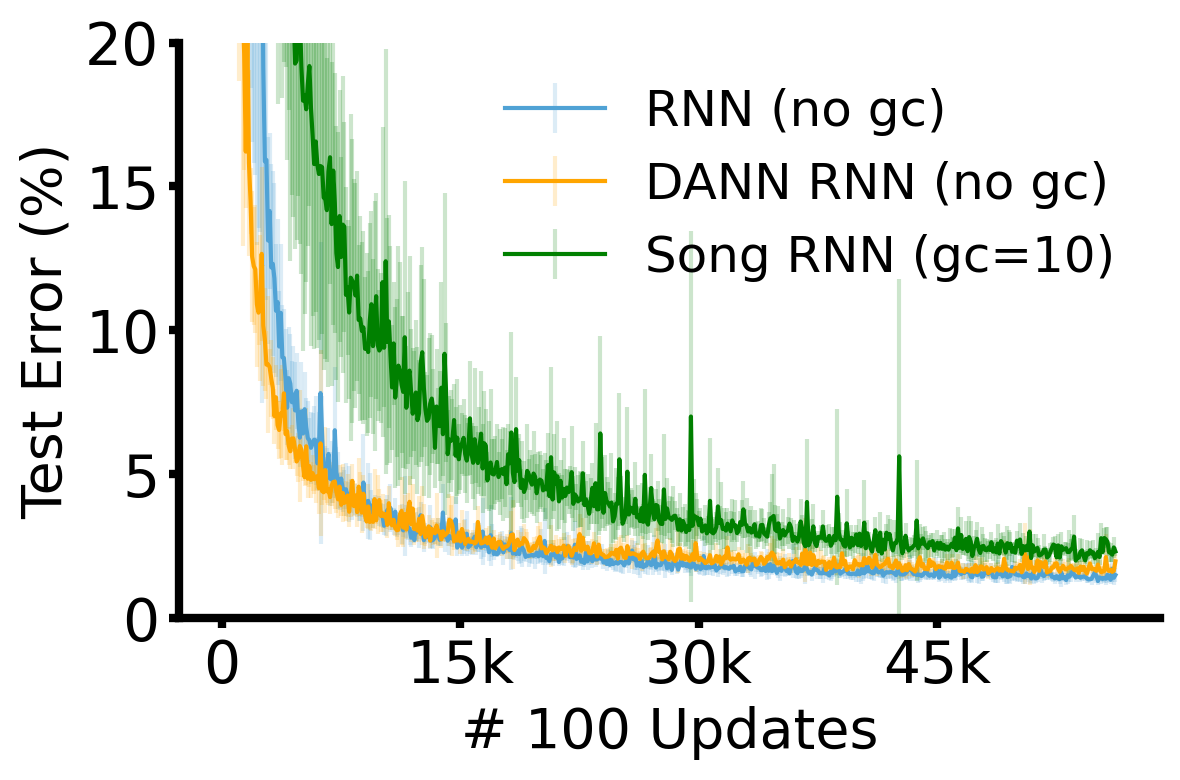

In [7]:
# Results for seq MNIST
seeds=5
rnn = {k: np.zeros((seeds,562)) for k in ["test_loss", "test_err", "train_loss", "train_err", "update"]}
dann_rnn = {k: np.zeros((seeds,562)) for k in ["test_loss", "test_err", "train_loss", "train_err", "update"]}
song_rnn = {k: np.zeros((seeds,562)) for k in ["test_loss", "test_err", "train_loss", "train_err", "update"]}

for i in range(seeds):
    (num_rec_cells, hidden, lr, GC) = (3, 100, 0.01, None)
    # r = np.load(f'/network/projects/linclab_users/danns/playground/seq_mnist_rnn_neural_comp/batch_size-32/seed-{i}/rnn_learning_curves_seed{i}_num_rec_cells{num_rec_cells}_hidden{hidden}_lr{lr}.npz')
    r = np.load(f'/network/projects/linclab_users/danns/playground/seq_mnist_test_rnn_hidden_NC/batch_size-32/seed-{i}/rnn_learning_curves_seed{i}_lr{lr}_GC{GC}.npz')
    rnn["train_err"][i, :] = r["train_err"]
    rnn["test_err"][i, :] = r["test_err"]
    rnn["train_loss"][i, :] = r["train_loss"]
    rnn["test_loss"][i, :] = r["test_loss"]
    rnn["update"][i, :] = r["update"]
    
    (num_rec_cells, hidden, lr, GC) = (3, 100, 0.01, None)
    d = np.load(f'/network/projects/linclab_users/danns/playground/seq_mnist_test_danns_hidden_NC/batch_size-32/seed-{i}/danns_learning_curves_seed{i}_lr{lr}_GC{GC}.npz')
    dann_rnn["train_err"][i, :] = d["train_err"]
    dann_rnn["test_err"][i, :] = d["test_err"]
    dann_rnn["train_loss"][i, :] = d["train_loss"]
    dann_rnn["test_loss"][i, :] = d["test_loss"]
    dann_rnn["update"][i, :] = d["update"]
    
    (num_rec_cells, hidden, lr, GC) = (3, 100, 0.01, 10)
    s = np.load(f'/network/projects/linclab_users/danns/playground/seq_mnist_test_song_hidden_NC/batch_size-32/seed-{i}/song_learning_curves_seed{i}_lr{lr}_GC{GC}.npz')
    song_rnn["train_err"][i, :] = s["train_err"]
    song_rnn["test_err"][i, :] = s["test_err"]
    song_rnn["train_loss"][i, :] = s["train_loss"]
    song_rnn["test_loss"][i, :] = s["test_loss"]
    song_rnn["update"][i, :] = s["update"]
ax = plt.subplot(111)
matplotlib.rcParams['figure.dpi'] = 200
matplotlib.rcParams["figure.figsize"] = (6,4)

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.spines.left.set_linewidth(3)
ax.spines.bottom.set_linewidth(3)
ax.xaxis.set_tick_params(width=3)
ax.yaxis.set_tick_params(width=3)

plt.xlabel('# 100 Updates', fontsize=20)
plt.ylabel('Test Error (%)', fontsize=20)
transparency = 0.2
_, _, bars = plt.errorbar(x=rnn["update"].mean(axis=0), y=rnn["test_err"].mean(axis=0), yerr=rnn["test_err"].std(axis=0), color='#50a2d5')
[bar.set_alpha(transparency) for bar in bars]
_, _, bars = plt.errorbar(x=dann_rnn["update"].mean(axis=0), y=dann_rnn["test_err"].mean(axis=0), yerr=dann_rnn["test_err"].std(axis=0), color='orange')
[bar.set_alpha(transparency) for bar in bars]
_, _, bars = plt.errorbar(x=song_rnn["update"].mean(axis=0), y=song_rnn["test_err"].mean(axis=0), yerr=song_rnn["test_err"].std(axis=0), color='green')
[bar.set_alpha(transparency) for bar in bars]

plt.ylim([0, 20])
# plt.legend(["RNN (no gc)", "Song RNN (gc=10)"], fontsize=18, frameon=False)
plt.legend(["RNN (no gc)",  "DANN RNN (no gc)", "Song RNN (gc=10)"], fontsize=18, frameon=False)
plt.yticks(ticks=[0, 5, 10, 15, 20], size=21)
plt.xticks(labels=["0", "15k", "30k", "45k"], ticks=[0, 15000, 30000, 45000], size=21)
plt.tight_layout()
# plt.savefig('new_plots/SeqMNIST_RNN_Song_Test_Acc.png', format='png', dpi=200)
# plt.savefig('new_plots/SeqMNIST_RNN_Song_Test_Acc.svg', format='svg', dpi=200)

# plt.savefig('new_plots/SeqMNIST_RNN_DANN_Song_Test_Acc.png', format='png', dpi=200)
# plt.savefig('new_plots/SeqMNIST_RNN_DANN_Song_Test_Acc.svg', format='svg', dpi=200)

plt.show()

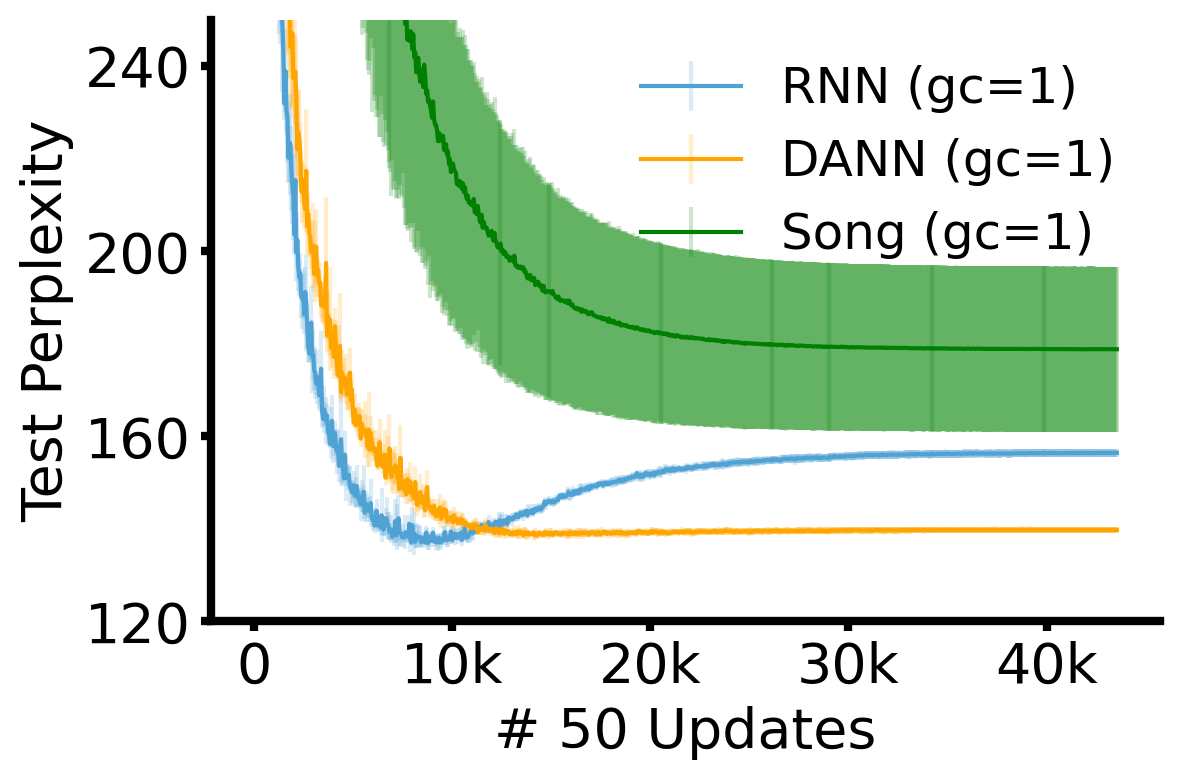

In [9]:
# Results for PTB
n = 873
seeds=5
rnn = {k: np.zeros((seeds,n)) for k in ["test_loss", "test_ppl", "val_loss", "val_ppl", "train_loss", "train_ppl", "update"]}
dann_rnn = {k: np.zeros((seeds,n)) for k in ["test_loss", "test_ppl", "val_loss", "val_ppl", "train_loss", "train_ppl", "update"]}
song_rnn = {k: np.zeros((seeds,n)) for k in ["test_loss", "test_ppl", "val_loss", "val_ppl", "train_loss", "train_ppl", "update"]}
for i in range(seeds):

    (lr, GC) = (0.805, 1)
    r = np.load(f'/network/projects/linclab_users/danns/playground/ptb_3layers_rnn_neural_comp_test/batch_size-64/seed-{i}/rnn_learning_curves_seed{i}_lr{lr}_GC{GC}.npz')
    rnn["train_ppl"][i, :] = r["train_ppl"] 
    rnn["val_ppl"][i, :] = r["val_ppl"]
    rnn["test_ppl"][i, :] = r["test_ppl"]
    rnn["train_loss"][i, :] = r["train_loss"]
    rnn["val_loss"][i, :] = r["val_loss"]
    rnn["test_loss"][i, :] = r["val_loss"]
    rnn["update"][i, :] = r["update"]

    (lr, GC) = (0.805, 1)
    d = np.load(f'/network/projects/linclab_users/danns/playground/ptb_3layers_danns_neural_comp_test/batch_size-64/seed-{i}/danns_learning_curves_seed{i}_lr{lr}_GC{GC}.npz')
    dann_rnn["train_ppl"][i, :] = d["train_ppl"]
    dann_rnn["val_ppl"][i, :] = d["val_ppl"]
    dann_rnn["test_ppl"][i, :] = d["test_ppl"]
    dann_rnn["train_loss"][i, :] = d["train_loss"]
    dann_rnn["val_loss"][i, :] = d["val_loss"]
    dann_rnn["test_loss"][i, :] = d["val_loss"]
    dann_rnn["update"][i, :] = d["update"]
    
    (lr, GC) = (1.554, 1)
    s = np.load(f'/network/projects/linclab_users/danns/playground/ptb_3layers_song_neural_comp_test/batch_size-64/seed-{i}/song_learning_curves_seed{i}_lr{lr}_GC{GC}.npz')
    song_rnn["train_ppl"][i, :] = s["train_ppl"]
    song_rnn["val_ppl"][i, :] = s["val_ppl"]
    song_rnn["test_ppl"][i, :] = s["test_ppl"]
    song_rnn["train_loss"][i, :] = s["train_loss"]
    song_rnn["val_loss"][i, :] = s["val_loss"]
    song_rnn["test_loss"][i, :] = s["test_loss"]
    song_rnn["update"][i, :] = s["update"]
    
transparency = 0.2

ax = plt.subplot(111)
matplotlib.rcParams['figure.dpi'] = 200
matplotlib.rcParams["figure.figsize"] = (6,4)

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.spines.left.set_linewidth(3)
ax.spines.bottom.set_linewidth(3)
ax.xaxis.set_tick_params(width=3)
ax.yaxis.set_tick_params(width=3)


_, _, bars = plt.errorbar(x=rnn["update"].mean(axis=0), y=rnn["test_ppl"].mean(axis=0), yerr=rnn["test_ppl"].std(axis=0), color='#50a2d5')
[bar.set_alpha(transparency) for bar in bars]
_, _, bars = plt.errorbar(x=dann_rnn["update"].mean(axis=0), y=dann_rnn["test_ppl"].mean(axis=0), yerr=dann_rnn["test_ppl"].std(axis=0), color='orange')
[bar.set_alpha(transparency) for bar in bars]
_, _, bars = plt.errorbar(x=song_rnn["update"].mean(axis=0), y=song_rnn["test_ppl"].mean(axis=0), yerr=song_rnn["test_ppl"].std(axis=0), color='green')
[bar.set_alpha(transparency) for bar in bars]

# _, _, bars = plt.errorbar(x=rnn["update"].mean(axis=0), y=rnn["train_ppl"].mean(axis=0), yerr=rnn["train_ppl"].std(axis=0))
# [bar.set_alpha(transparency) for bar in bars]
# _, _, bars = plt.errorbar(x=dann_rnn["update"].mean(axis=0), y=dann_rnn["train_ppl"].mean(axis=0), yerr=dann_rnn["train_ppl"].std(axis=0))
# [bar.set_alpha(transparency) for bar in bars]
# _, _, bars = plt.errorbar(x=song_rnn["update"].mean(axis=0), y=song_rnn["train_ppl"].mean(axis=0), yerr=song_rnn["train_ppl"].std(axis=0))
# [bar.set_alpha(transparency) for bar in bars]

plt.ylim([120, 250])
plt.ylabel('Test Perplexity', fontsize=20)
plt.xlabel('# 50 Updates', fontsize=20)
plt.legend(["RNN (gc=1)", "DANN (gc=1)", "Song (gc=1)"], fontsize=18, frameon=False)
# plt.legend(["RNN (gc=1)", "Song (gc=1)"], fontsize=18, frameon=False)
plt.yticks(ticks=[120, 160, 200, 240], size=20)
plt.xticks(labels=["0", "10k", "20k", "30k", "40k"], ticks=[0, 10000, 20000, 30000, 40000], size=20)
plt.tight_layout()

# plt.savefig('new_plots/PTB_RNN_Song_Test_Acc.png', format='png', dpi=200)
# plt.savefig('new_plots/PTB_RNN_Song_Test_Acc.svg', format='svg', dpi=200)
# plt.savefig('new_plots/PTB_RNN_DANN_Song_Test_Acc.png', format='png', dpi=200)
# plt.savefig('new_plots/PTB_RNN_DANN_Song_Test_Acc.svg', format='svg', dpi=200)

plt.show()

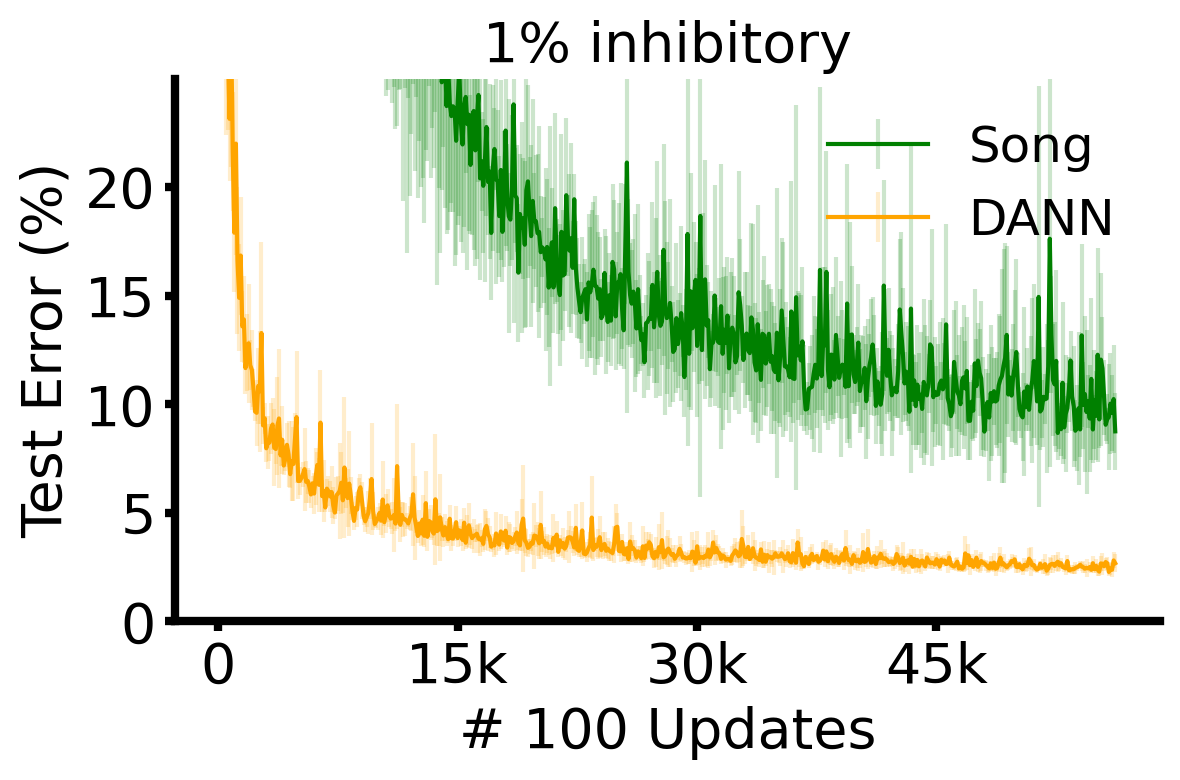

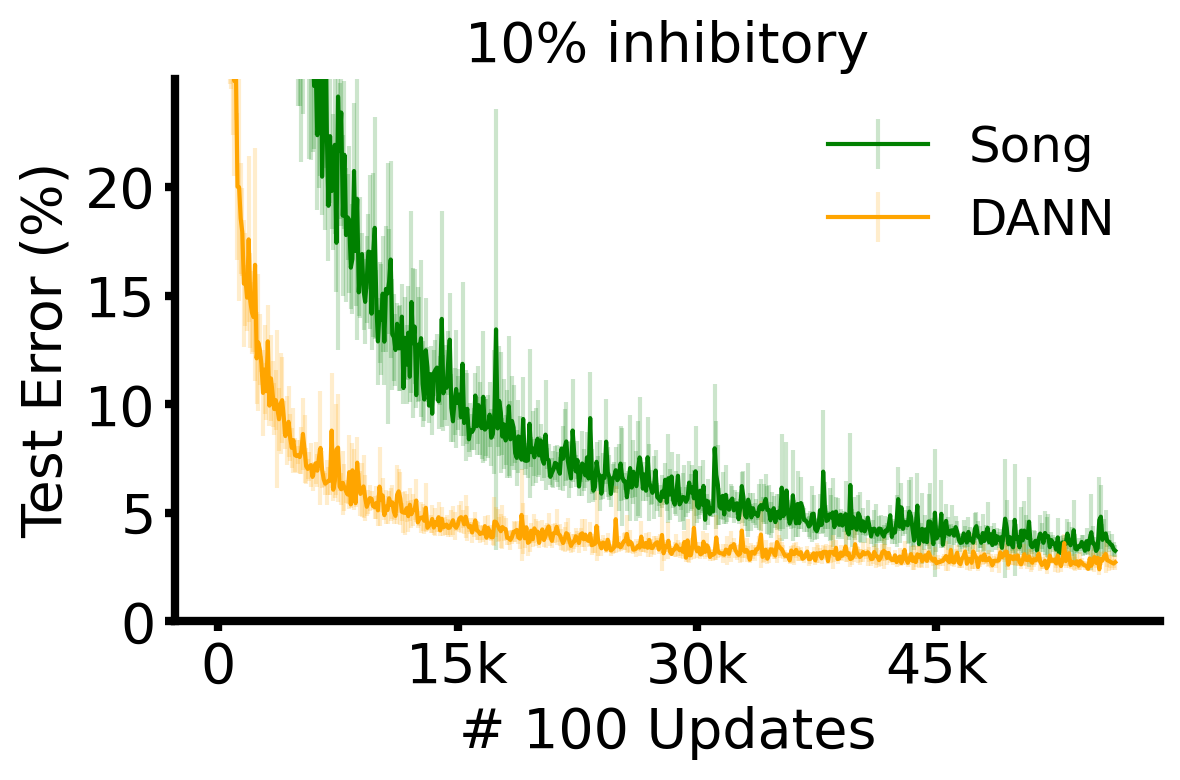

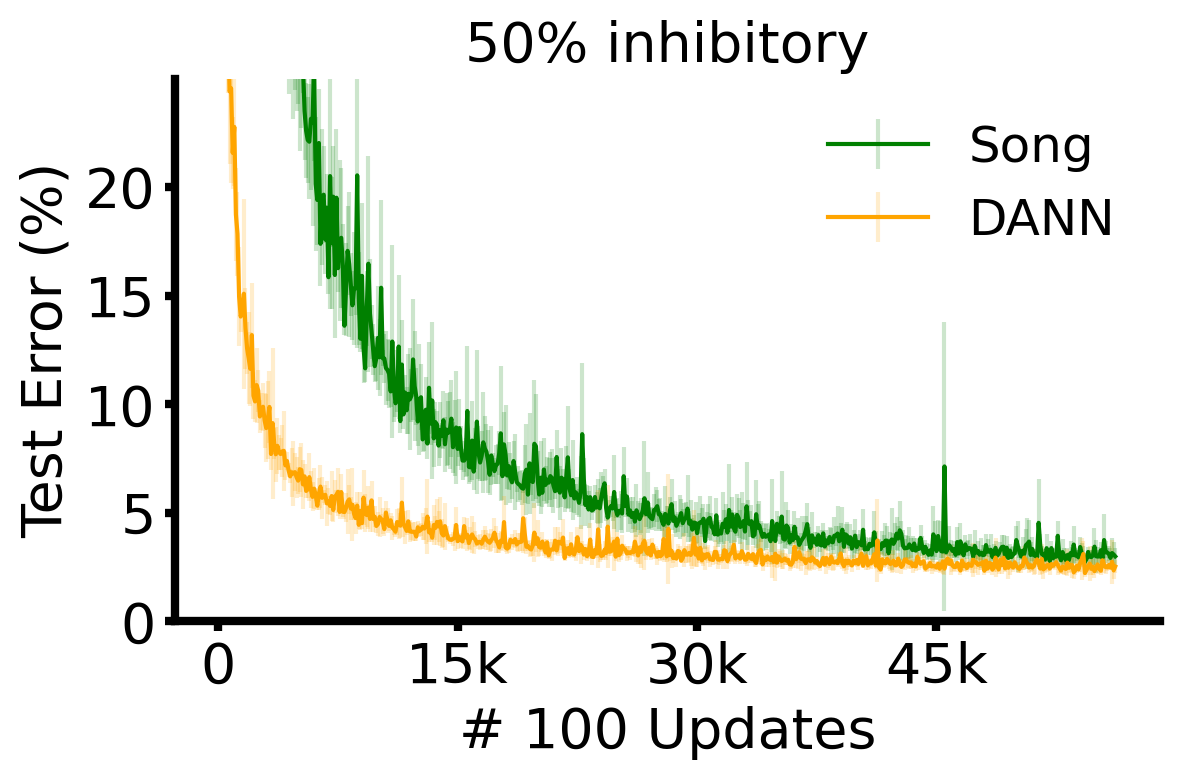

In [14]:
seeds=5
dann_rnn = {k: np.zeros((seeds,562)) for k in ["test_loss", "test_err", "train_loss", "train_err", "update"]}
song_rnn = {k: np.zeros((seeds,562)) for k in ["test_loss", "test_err", "train_loss", "train_err", "update"]}
transparency = 0.2

leg = ["1% inhibitory", "10% inhibitory", "50% inhibitory"]
for ind, inhib in enumerate([99, 9, 1]):
    for i in range(seeds):
        if inhib == 1: (lr, GC) = (0.010772, 10)
        if inhib == 9: (lr, GC) = (0.010772, 10)
        if inhib == 99: (lr, GC) = (0.010772, 5)
        s = np.load(f'/network/projects/linclab_users/danns/playground/seq_mnist_song_inhib_NC_test/batch_size-32/seed-{i}/song_learning_curves_seed{i}_inhib{inhib}_lr{lr}_GC{GC}.npz')

        song_rnn["train_err"][i, :] = s["train_err"]
        song_rnn["test_err"][i, :] = s["test_err"]
        song_rnn["train_loss"][i, :] = s["train_loss"]
        song_rnn["test_loss"][i, :] = s["test_loss"]
        song_rnn["update"][i, :] = s["update"]
        
        if inhib == 1: (lr, GC) = (0.010772, 10)
        if inhib == 9: (lr, GC) = (0.010772, 5)
        if inhib == 99: (lr, GC) = (0.023208, 5)
        d = np.load(f'/network/projects/linclab_users/danns/playground/seq_mnist_danns_inhib_NC_test/batch_size-32/seed-{i}/danns_learning_curves_seed{i}_inhib{inhib}_lr{lr}_GC{GC}.npz')

        dann_rnn["train_err"][i, :] = d["train_err"]
        dann_rnn["test_err"][i, :] = d["test_err"]
        dann_rnn["train_loss"][i, :] = d["train_loss"]
        dann_rnn["test_loss"][i, :] = d["test_loss"]
        dann_rnn["update"][i, :] = d["update"]
    
    ax = plt.subplot(111)
    matplotlib.rcParams['figure.dpi'] = 200
    matplotlib.rcParams["figure.figsize"] = (6,4)

    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.spines.left.set_linewidth(3)
    ax.spines.bottom.set_linewidth(3)
    ax.xaxis.set_tick_params(width=3)
    ax.yaxis.set_tick_params(width=3)

    _, _, bars = ax.errorbar(x=song_rnn["update"].mean(axis=0), y=song_rnn["test_err"].mean(axis=0), yerr=song_rnn["test_err"].std(axis=0), color='green')
    [bar.set_alpha(transparency) for bar in bars]
    # print(song_rnn["test_err"].mean(axis=0)[-1])
    _, _, bars = ax.errorbar(x=dann_rnn["update"].mean(axis=0), y=dann_rnn["test_err"].mean(axis=0), yerr=dann_rnn["test_err"].std(axis=0), color='orange')
    [bar.set_alpha(transparency) for bar in bars]
    # print(dann_rnn["test_err"].mean(axis=0)[-1])

    ax.set_ylim([0, 25])
    ax.set_title(leg[ind], size=20)
    ax.legend(["Song","DANN"], frameon=False, fontsize=18)
    ax.set_ylabel("Test Error (%)", size=20)
    ax.set_xlabel("# 100 Updates", size=20)
    ax.tick_params(axis='both', which='major', labelsize=20)
    
    ax.set_yticks(ticks=[0, 5, 10, 15, 20], size=20)
    ax.set_xticks(labels=["0", "15k", "30k", "45k"], ticks=[0, 15000, 30000, 45000], size=20)
    plt.tight_layout()
#     plt.savefig(f'new_plots/Song_DANN_{leg[ind]}_Test.png', format='png', dpi=200)
#     plt.savefig(f'new_plots/Song_DANN_{leg[ind]}_Test.svg', format='svg', dpi=200)
    plt.show()

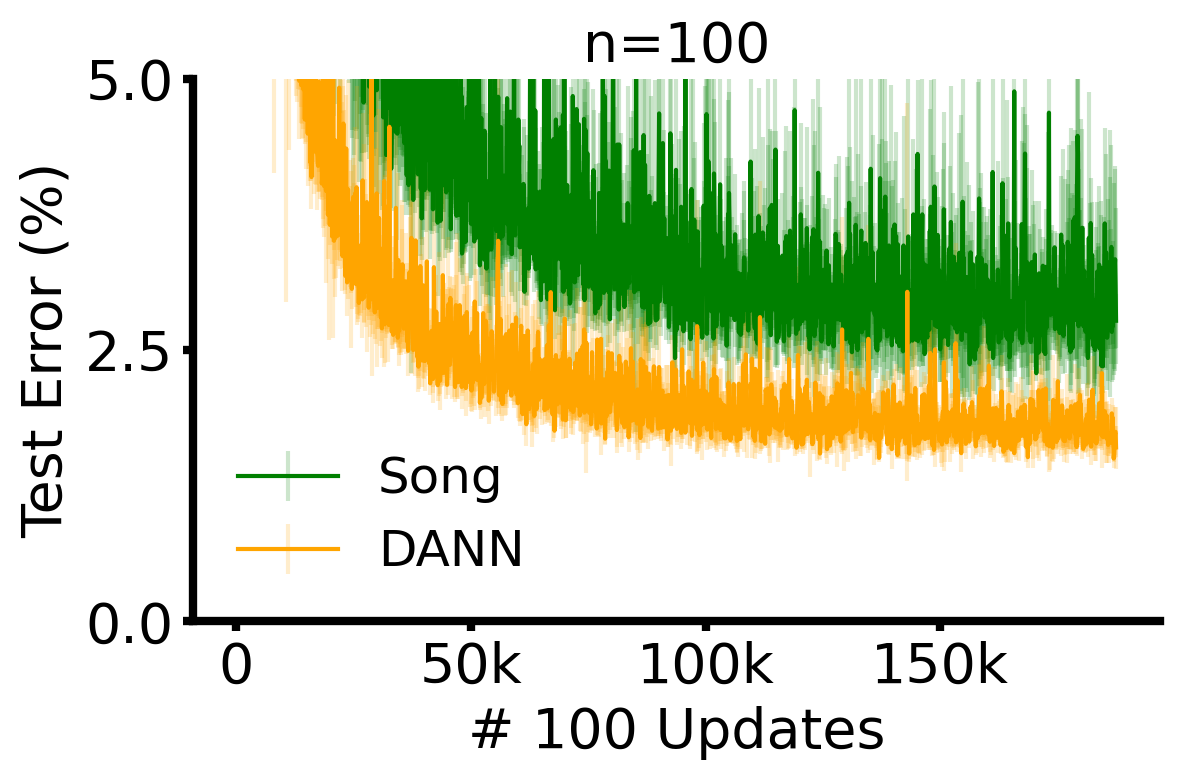

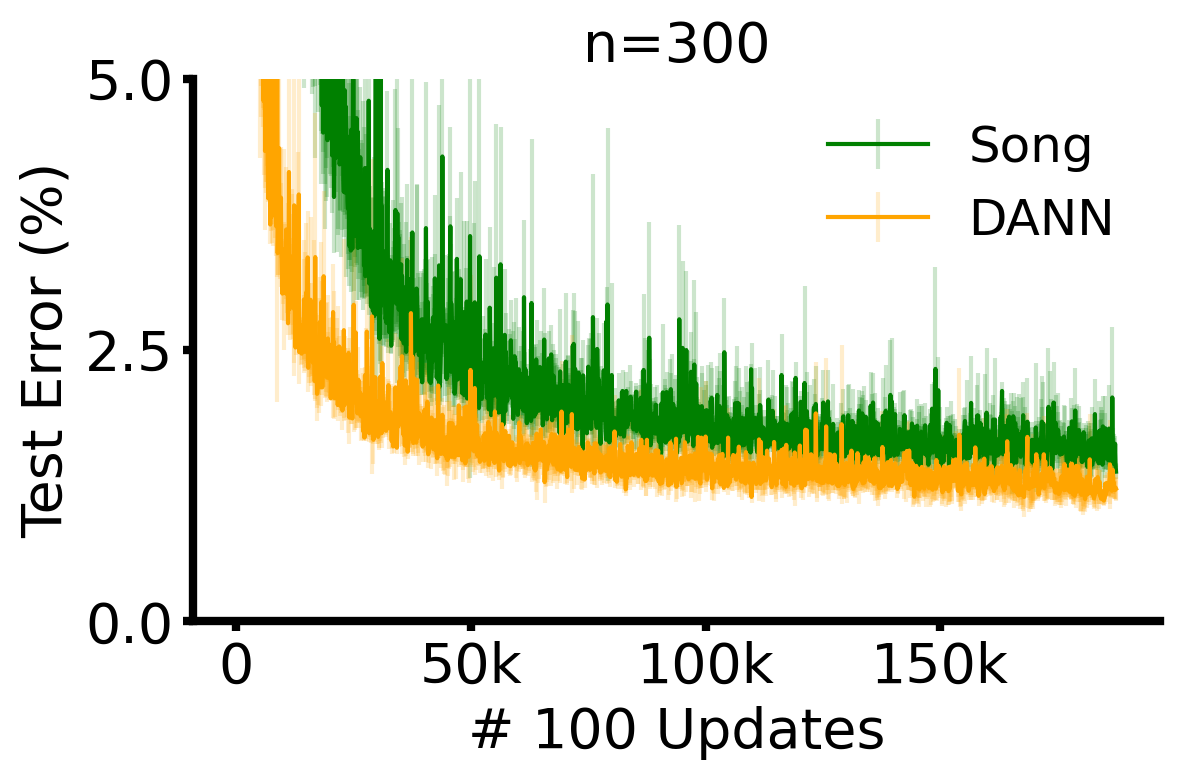

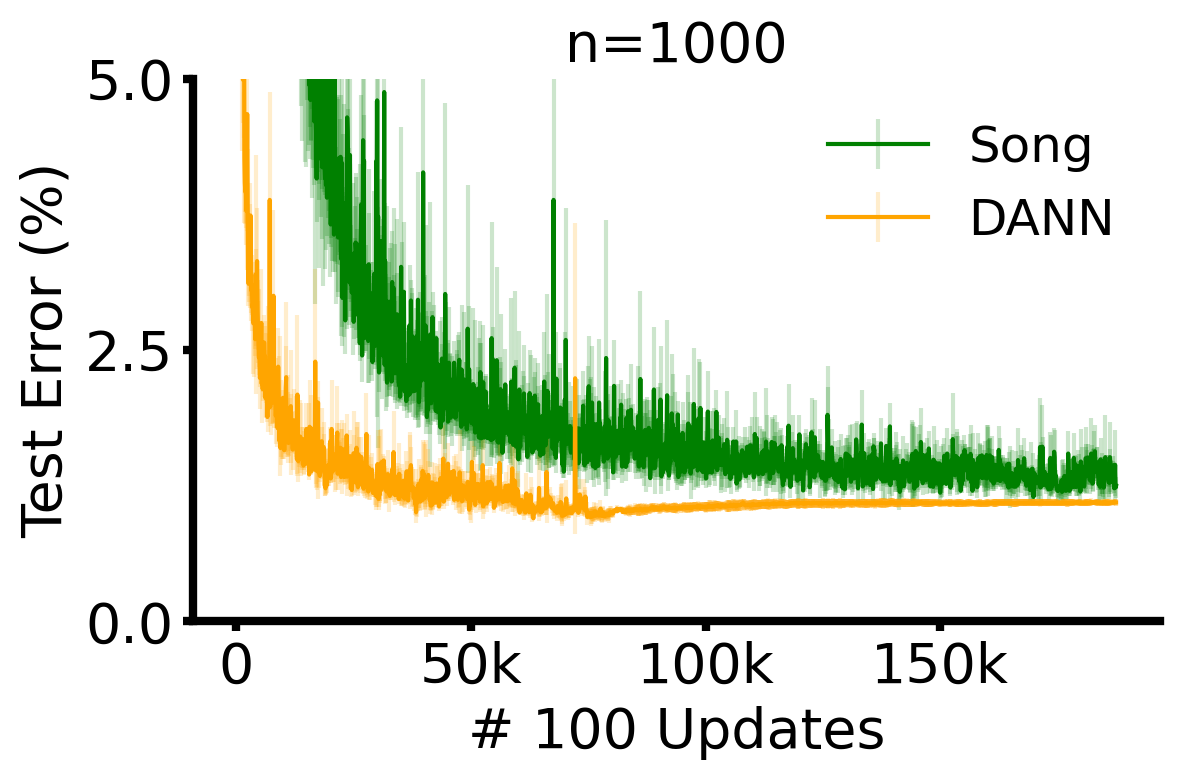

In [12]:
seeds=5
dann_rnn = {k: np.zeros((seeds,1875)) for k in ["test_loss", "test_err", "train_loss", "train_err", "update"]}
song_rnn = {k: np.zeros((seeds,1875)) for k in ["test_loss", "test_err", "train_loss", "train_err", "update"]}
transparency = 0.2

leg = ["n=100", "n=300", "n=1000"]
for ind, size in enumerate([100, 300, 1000]):
    for i in range(seeds):
        if size == 100: (lr, GC, rad, hidden) = (0.015811, 10, 2.0, 100)
        if size == 300: (lr, GC, rad, hidden) = (0.015811, 10, 2.0, 300)
        if size == 1000: (lr, GC, rad, hidden) = (0.015811, 10, 2.0, 1000)
        s = np.load(f'/home/mila/p/pingsheng.li/seq_mnist_test_song_shallow_NC/seed-{i}/song_learning_curves_seed{i}_hidden{hidden}_lr{lr}_GC{GC}_rad{rad}.npz')
            
        song_rnn["train_err"][i, :] = s["train_err"]
        song_rnn["test_err"][i, :] = s["test_err"]
        song_rnn["train_loss"][i, :] = s["train_loss"]
        song_rnn["test_loss"][i, :] = s["test_loss"]
        song_rnn["update"][i, :] = s["update"]
        
        if size == 100: (lr, GC, rad, hidden) = (0.015811, 10, 0.85, 100)
        if size == 300: (lr, GC, rad, hidden) = (0.015811, 10, 0.98, 300)
        if size == 1000: (lr, GC, rad, hidden) = (0.015811, 10, 0.89, 1000)
        
        d = np.load(f'/home/mila/p/pingsheng.li/seq_mnist_test_danns_shallow_NC/seed-{i}/danns_learning_curves_seed{i}_hidden{hidden}_lr{lr}_GC{GC}_rad{rad}.npz')

        dann_rnn["train_err"][i, :] = d["train_err"]
        dann_rnn["test_err"][i, :] = d["test_err"]
        dann_rnn["train_loss"][i, :] = d["train_loss"]
        dann_rnn["test_loss"][i, :] = d["test_loss"]
        dann_rnn["update"][i, :] = d["update"]
    
    ax = plt.subplot(111)
    matplotlib.rcParams['figure.dpi'] = 200
    matplotlib.rcParams["figure.figsize"] = (6,4)

    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.spines.left.set_linewidth(3)
    ax.spines.bottom.set_linewidth(3)
    ax.xaxis.set_tick_params(width=3)
    ax.yaxis.set_tick_params(width=3)

    _, _, bars = ax.errorbar(x=song_rnn["update"].mean(axis=0), y=song_rnn["test_err"].mean(axis=0), yerr=song_rnn["test_err"].std(axis=0), color='green')
    [bar.set_alpha(transparency) for bar in bars]
    # print(song_rnn["test_err"].mean(axis=0)[-1])
    _, _, bars = ax.errorbar(x=dann_rnn["update"].mean(axis=0), y=dann_rnn["test_err"].mean(axis=0), yerr=dann_rnn["test_err"].std(axis=0), color='orange')
    [bar.set_alpha(transparency) for bar in bars]
    # print(dann_rnn["test_err"].mean(axis=0)[-1])

    ax.set_ylim([0, 5])
    ax.set_title(leg[ind], size=20)
    ax.legend(["Song","DANN"], frameon=False, fontsize=18)
    ax.set_ylabel("Test Error (%)", size=20)
    ax.set_xlabel("# 100 Updates", size=20)
    ax.tick_params(axis='both', which='major', labelsize=20)
    
    ax.set_yticks(ticks=[0,2.5,5], size=20)
    ax.set_xticks(labels=["0", "50k", "100k", "150k"], ticks=[0, 50000, 100000, 150000], size=20)
    plt.tight_layout()
#     plt.savefig(f'new_plots/Song_DANN_{leg[ind]}_Test.png', format='png', dpi=200)
#     plt.savefig(f'new_plots/Song_DANN_{leg[ind]}_Test.svg', format='svg', dpi=200)
    plt.show()